# Classification par plus proches voisins

In [1]:
import numpy as np

def dist2(a,b):
    d = (np.array(a) - np.array(b))**2
    d = sum(d)
    return np.sqrt(d)

In [2]:
from operator import itemgetter

def knn_index(z,data,k,dist):
    n,d = data.shape
    sorted_index = np.zeros((n,2))
    
    for i in range(n):
        sorted_index[i] = i,dist(z,data[i])
    
    sorted_index = sorted(sorted_index,key=itemgetter(1))
    sorted_index = np.array(sorted_index)[:,0]
    
    return sorted_index[0:k].astype(int)

def classify_kNN(z,data,labels,k,dist):
    
    knn_ind = knn_index(z,data,k,dist)
    label_knn,label_occ = np.unique(labels[knn_ind],return_counts=True)        
    
    if (len(label_knn) > 1):
        knn_ind = knn_index(z,data,k+1,dist)
        label_knn,label_occ = np.unique(labels[knn_ind],return_counts=True)        

    label_knn = label_knn[label_occ==max(label_occ)]
        
    return label_knn.astype(int)

In [3]:
import matplotlib.pyplot as plt

def plot_knn(z,data,k,dist,couleur='black'):
    ind_knn = knn_index(z,data,k,dist)
    kNN = data[ind_knn]
    plt.scatter(kNN[:,0],kNN[:,1],color=couleur,marker='x',label='kNN')    

# Comparaison avec le perceptron

Generer un echantillon gaussien avec ses labels

In [4]:
def gaussian_samples(n,N=2,scale=2,show=False):
    
    if N>4 or N<2:
        print("N must be in [2,4]")
        return False
    
    V = [[1,1],[-1,1],[1,-1],[-1,-1]]
    colors = ['red','green','yellow','pink']
    
    data=np.random.randn(n,2) + np.array(V[0]) * scale
    labels=np.zeros(n)
    if show:
        plt.scatter(data[:,0],data[:,1],color=colors[0], label='classe 0')
    
    for i in np.arange(1,N):
        data1 = np.random.randn(n,2) + np.array(V[i]) * scale
        labels1 = np.ones(n) * i
        data = np.concatenate([data,np.array(data1)])
        labels = np.concatenate([labels,labels1])
        if show:
            plt.scatter(data1[:,0],data1[:,1],color=colors[i], label='classe '+str(i))
            
    return data,labels

on utilise la library perceptron du tp2

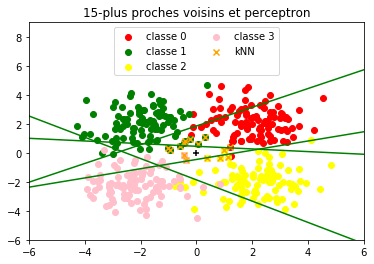

In [5]:
import perceptron
from display import gaussian_samples

z, n_neighbours = [0,0], 15
data_gaussian,labels_gaussian = gaussian_samples(100,N=4,show=True)

plot_knn(z,data_gaussian,n_neighbours,dist2,couleur='orange')
perceptron.plot_multiperceptron(data_gaussian,labels_gaussian)
plt.scatter(z[0],z[1], marker="+",color='black')

plt.xlim(-6,6)
plt.ylim(-6,9)
plt.title(str(n_neighbours) + '-plus proches voisins et perceptron')
plt.legend(loc="upper center",ncol=2)
plt.show()

# Les bonnes library

Données gaussiennes : kNN

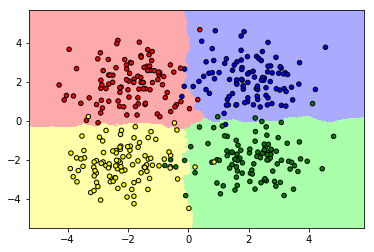

In [6]:
from sklearn import neighbors
from display import display_classifier

kNN = neighbors.KNeighborsClassifier(n_neighbours)
kNN.fit(data_gaussian,labels_gaussian)
display_classifier(kNN,data_gaussian,labels_gaussian)

Données Blobs + perceptron

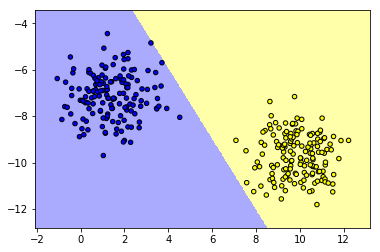

In [7]:
from sklearn import datasets,linear_model

data_blob,labels_blob = datasets.make_blobs(n_samples=300, n_features=2,
                                            centers=2, cluster_std=1.0,
                                            center_box=(-10.0, 10.0))                         
net = linear_model.Perceptron()
net.fit(data_blob,labels_blob)
                                    
display_classifier(net,data_blob,labels_blob)

# test sur données Iris

Données Iris : train et cross_validation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

iris = datasets.load_iris()
iris_data = iris.data[:,:2]
iris_train, iris_test, iris_y_train, iris_y_test = train_test_split(iris_data,
                                                                iris.target,
                                                                test_size=0.2,
                                                                random_state=0)

Ici on peut voir le taux d'erreur en fonction de k

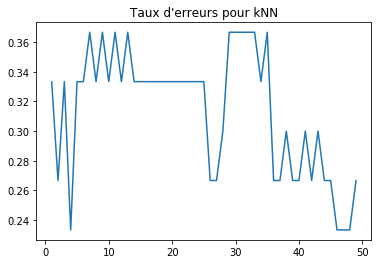

In [9]:
def kNN_test_errors(k,X_train,y_train,X_test,y_test):
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    return sum((clf.predict(X_test) == y_test) == False)/len(y_test)

def test_errors(K,X_train,y_train,X_test,y_test,disp=False):
    K = np.arange(1,K)
    err_kNN = [kNN_test_errors(k,X_train,y_train,
                             X_test,y_test) for k in K]
    if disp:
        plt.plot(K,err_kNN)
        plt.title("Taux d'erreurs pour kNN")
        plt.show()
    else:
        return err_kNN

test_errors(50,iris_train,iris_y_train,
                iris_test,iris_y_test,disp=True)

Classifier + test sur cross-validation data

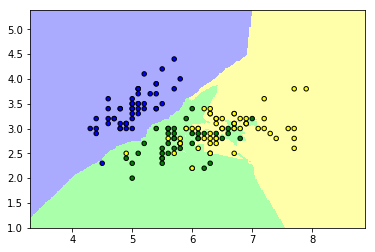

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.75      0.69      0.72        13
          2       0.43      0.50      0.46         6

avg / total       0.78      0.77      0.77        30



In [10]:
kNN = neighbors.KNeighborsClassifier(4)
kNN.fit(iris_train,iris_y_train)

display_classifier(kNN,iris_data,iris.target)

predicted = kNN.predict(iris_test)
print(classification_report(iris_y_test,predicted))

In [11]:
from sklearn import cross_validation
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = cross_validation.KFold(6,n_folds=2)
print(kf)
for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

sklearn.cross_validation.KFold(n=6, n_folds=2, shuffle=False, random_state=None)
TRAIN: [3 4 5] TEST: [0 1 2]


/Users/kevinzagalo/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


IndexError: index 4 is out of bounds for axis 0 with size 4

In [12]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

2018-11-23 15:03:38,757 Loading LFW people faces from /Users/kevinzagalo/scikit_learn_data/lfw_home
2018-11-23 15:03:38,823 Loading face #00001 / 01151


Automatically created module for IPython interactive environment


OSError: cannot identify image file '/Users/kevinzagalo/scikit_learn_data/lfw_home/lfw_funneled/Colin_Powell/Colin_Powell_0170.jpg'